<a href="https://colab.research.google.com/github/GuilleGarciaAlvarez/Tenerife2025/blob/main/clean_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#upload data from Github

!pip install openpyxl

import requests
from io import BytesIO

# GitHub file URL
url = "https://github.com/GuilleGarciaAlvarez/Tenerife2025/raw/main/Tenerife_questionnaire_2025_-_all_versions_-_labels_-_2025-03-19-23-38-27.xlsx"

# Download the file
response = requests.get(url)

# Read the Excel file into pandas
df = pd.read_excel(BytesIO(response.content), engine="openpyxl")



In [4]:
column_mapping = {

    "start": "start_time",
    "end": "end_time",

    # Consent Agreement
    "Gracias por tomarse el tiempo para participar en nuestra encuesta. Su aporte es invaluable para recopilar perspectivas y conocimientos sobre los desastres naturales en Tenerife y las medidas que se pueden tomar contra ellos. Sus respuestas nos ayudarán a comprender mejor la vulnerabilidad a los desastres naturales e informar a los responsables de las políticas en consecuencia. Esta encuesta es completamente anónima y sus respuestas se mantendrán confidenciales. La encuesta tomará un máximo de 10 minutos. Si tiene alguna pregunta o comentario durante la encuesta, no dude en pedir apoyo. ¡Muchas gracias por su participación!  ¿Está de acuerdo en participar en esta encuesta y tiene 18 años o más? ": "consent",

    # Basic Demographics
    "¿En qué ciudad de Tenerife vive? (Por favor, indique si es turista o residente a tiempo parcial)": "city",
    "¿Cuál es su edad?": "age",
    "¿Cuál es su género?": "gender",
    "¿Cuál es su nivel educativo más alto completado?": "education",
    "Indique sus ingresos anuales (en euros)": "income",
    "¿Es usted propietario de la vivienda en la que reside? " : "home_ownership",
    '¿Alguno de sus hijos vive actualmente en su hogar? ' : "child_home",
    '¿Cuántas personas en tu hogar necesitarían asistencia en caso de emergencia? ' : "assistance",
    '¿Posee usted un automóvil?': "car",
    '¿Vive usted cerca de un barranco o un río? ' : "close_river",
    '¿Cómo describiría el área que rodea su hogar? ' : "surroundings",

    # Perceived Environmental Risks
    "¿Qué peligros ambientales siente que representan un riesgo para usted? (Puede seleccionar múltiples opciones)" : "perceived_risks",
    "¿Qué peligros ambientales siente que representan un riesgo para usted? (Puede seleccionar múltiples opciones)/Incendios forestales": "risk_wildfires",
    "¿Qué peligros ambientales siente que representan un riesgo para usted? (Puede seleccionar múltiples opciones)/Inundaciones": "risk_floods",
    "¿Qué peligros ambientales siente que representan un riesgo para usted? (Puede seleccionar múltiples opciones)/Erupciones volcánicas": "risk_volcanoes",
    "¿Qué peligros ambientales siente que representan un riesgo para usted? (Puede seleccionar múltiples opciones)/Desprendimientos de rocas": "risk_rockfalls",
    "¿Qué peligros ambientales siente que representan un riesgo para usted? (Puede seleccionar múltiples opciones)/Ninguno de los anteriores": "risk_none",

    # Past Personal Impact
    "¿Ha sido afectado personalmente anteriormente por alguno de los peligros mencionados en la pregunta anterior? (Puede seleccionar múltiples opciones)": "past_impact",
    "¿Ha sido afectado personalmente anteriormente por alguno de los peligros mencionados en la pregunta anterior? (Puede seleccionar múltiples opciones)/Sí, inundaciones": "impact_floods",
    "¿Ha sido afectado personalmente anteriormente por alguno de los peligros mencionados en la pregunta anterior? (Puede seleccionar múltiples opciones)/Sí, incendios forestales": "impact_wildfires",
    "¿Ha sido afectado personalmente anteriormente por alguno de los peligros mencionados en la pregunta anterior? (Puede seleccionar múltiples opciones)/Sí, erupciones volcánicas": "impact_volcanoes",
    "¿Ha sido afectado personalmente anteriormente por alguno de los peligros mencionados en la pregunta anterior? (Puede seleccionar múltiples opciones)/Sí, desprendimientos": "impact_rockfalls",
    "¿Ha sido afectado personalmente anteriormente por alguno de los peligros mencionados en la pregunta anterior? (Puede seleccionar múltiples opciones)/No, ninguno de los anteriores": "impact_none",


    # Damage Type
    "¿Qué tipo de daño experimentó cuando sucedió el evento? ": "damage_type",
    "¿Qué tipo de daño experimentó cuando sucedió el evento? /Económico (leve)": "damage_economic_mild",
    "¿Qué tipo de daño experimentó cuando sucedió el evento? /Económico (moderado)": "damage_economic_moderate",
    "¿Qué tipo de daño experimentó cuando sucedió el evento? /Económico (severo)": "damage_economic_severe",
    "¿Qué tipo de daño experimentó cuando sucedió el evento? /Emocional (leve)": "damage_emotional_mild",
    "¿Qué tipo de daño experimentó cuando sucedió el evento? /Emocional (moderado)": "damage_emotional_moderate",
    "¿Qué tipo de daño experimentó cuando sucedió el evento? /Emocional (severo)": "damage_emotional_severe",

    # Other Survey Questions
    "¿Cuánto tiempo le llevo recuperarse del evento que ha seleccionado anteriormente?": "recovery_time",
    "¿Algún otro evento climático ocurrió mientras aún se recuperaba del evento mencionado anteriormente?": "climate_event_during_recovery",
    "En una escala del 1 al 5, ¿cómo de preparado diría que está usted si ocurriera alguno de estos peligros? ": "preparedness_scale",
    "¿Ha tomado alguna medida de adaptación ante alguno de estos riesgos climáticos?": "adaptation",
    "¿Qué tipo de medidas de adaptación ha tomado?": "adaptation_type",
    "¿Por qué no ha tomado ninguna (otra) medida de adaptación? ": "adaptation_barriers",

    # Willingness to Pay
    " ¿Cuánto dinero (en euros) estaría dispuesto a pagar por protección contra estos peligros? (pago único)": "willingness_to_pay_protection",
    "¿Cuánto dinero extra estaría dispuesto a pagar para preservar la naturaleza en los alrededores de su hogar? (pago único) ": "willingness_to_pay_nature",

    # Future Risk Perception
    "¿Cree que los peligros naturales citados anteriormente se volverán más frecuentes y dañinos en el futuro? (1 = No puede empeorar, 5 = Puede empeorar mucho)": "future_risk_perception",

    # Government Trust & Preparedness
    "En una escala del 1 al 5, ¿cuánto confía en el gobierno actual?": "trust_government",
    "¿Le ha proporcionado el gobierno procedimientos de evacuación (o acerca de cómo actuar) ante alguno de estos peligros?": "govt_evacuation_procedures",
    "¿Dependes de una única ruta de evacuación o tienes múltiples opciones?": "evacuation_routes",
    "¿A qué distancia de un evento  (como los descritos anteriormente) que avanza en su dirección, consideraría evacuar su hogar?": "evacuation_distance",
    "En una escala del 1 al 5, ¿hasta qué punto confía en que las autoridades locales le protegen de los riesgo climáticos mencionados anteriormente?": "trust_local_authorities",

    # Additional Information
    "¿Hay algo más que le gustaría añadir?": "additional_comments",

}



In [5]:
df.rename(columns=column_mapping, inplace=True)

print(df.columns)

Index(['start_time', 'end_time', 'consent', 'city', 'age', 'gender',
       'education', 'income', 'perceived_risks', 'risk_wildfires',
       'risk_floods', 'risk_volcanoes', 'risk_rockfalls', 'risk_none',
       'past_impact', 'impact_floods', 'impact_wildfires', 'impact_volcanoes',
       'impact_rockfalls', 'impact_none', 'damage_type',
       'damage_economic_mild', 'damage_economic_moderate',
       'damage_economic_severe', 'damage_emotional_mild',
       'damage_emotional_moderate', 'damage_emotional_severe', 'recovery_time',
       'climate_event_during_recovery', 'preparedness_scale', 'adaptation',
       'adaptation_type', 'adaptation_barriers',
       'willingness_to_pay_protection', 'willingness_to_pay_nature',
       'future_risk_perception', 'home_ownership', 'child_home',
       '¿Alguno de sus hijos vive actualmente en su hogar? /Sí',
       '¿Alguno de sus hijos vive actualmente en su hogar? /No, no viven conmigo',
       '¿Alguno de sus hijos vive actualmente en su h

In [6]:
df = df.dropna(subset=['consent'])

df = df[df["consent"] != "No"]

In [7]:
city_mapping={
    'Tegueste': 'Tegueste',
    'los Realejos Residente': 'Los Realejos',
    'Resident': 'other',
    'Icod de los vinos': 'Icod de los Vinos',
    'Los Realejos': 'Los Realejos',
    'los realejos, residente': 'Los Realejos',
    'Santa Cruz': 'Santa Cruz',
    'Icod. Residente': 'Icod de los Vinos',
    'San Juan de la Rabla': 'San Juan de la Rambla',
    'Puerto de la cruz': 'Puerto de la Cruz',
    'La Orotava': 'La Orotava',
    'la Orotava': 'La Orotava',
    'Soy turista, viajando': 'Tourist',
    'Icod de los Vinos': 'Icod de los Vinos',
    'Residente': 'other',
    'San Juan de La Rambla': 'San Juan de la Rambla',
    'Santa Cruz de Tenerife': 'Santa Cruz',
    'La Orotava, residente': 'La Orotava',
    'Las Chumberas, residente': 'Las Chumberas',
    'Valle Tabares': 'Valle Tabares',
    'Tejina': 'Tejina',
    'Santa cruzeiro de tenerife': 'Santa Cruz',
    'PUNTA DEL HIDALGO RESIDENTE': 'Punta del Hidalgo',
    'Bajamar': 'Bajamar',
    'Taganana': 'Taganana',
    'La Guancha.Residente permanente.': 'La Guancha',
    'Residente. La Laguna': 'La Laguna',
    'Tegueste, residente': 'Tegueste',
    'Santa Ursula': 'Santa Ursula',
    'Los realejos, residente': 'Los Realejos',
    'Garachico, residente': 'Garachico',
    'San Antres': 'San Antres',
    'Candelaria': 'Candelaria',
    'Los cidos': 'Los Cidos',
    'La laguna': 'La Laguna',
    'Playa de San Marcos': 'San Marcos',
    'La Montañeta': 'La Montañeta',
    'Turista': 'Tourist',
    'Turista en puerto de la cruz ': 'Tourist',
    'Turistas san marco': 'Tourist',
    'Turista en san marcos': 'Tourist',
    'Turista de san marcos ': 'Tourist',
    'San marcos': 'San Marcos',
    'Icod residente canario': 'Icod de los Vinos',
    'Tourist ': 'Tourist',
    'San cristobal de la laguna': 'San Cristóbal de la Laguna',
    'La laguna ': 'La Laguna',
    'La  laguna ': 'La Laguna',
    'Resitente': 'other',
    'El Sauzal, Ravelo': 'El Sauzal',
    'El sauzal,residente': 'El Sauzal',
    'El sauzal residente': 'El Sauzal',
    'Taganana\n': 'Taganana',
    'Turista, Santo Domingo': 'Tourist',
    'San Marcos': 'San Marcos',
    'Icod': 'Icod de los Vinos',
    'La Guancha': 'La Guancha',
    'Garachico': 'Garachico',
    'Icod residente': 'Icod de los Vinos',
    'Los REALEJOS': 'Los Realejos',
    'Santa Cruz. Residente.': 'Santa Cruz',
    'San marcos tourist ': 'Tourist',
    'Tourist san marcos ': 'Tourist',
    'Icod de los vino ': 'Icod de los Vinos',
    'San Juan de la rambla': 'San Juan de la Rambla',
    'San Juan de la Rambla': 'San Juan de la Rambla',
    'El Sauzal': 'El Sauzal',
    'Tourist': 'Tourist',
    'Tacoronte': 'Tacoronte',
    'Tacoronte ': 'Tacoronte',
    'El sauzal': 'El Sauzal',
    'Tacoronte soy residente': 'Tacoronte',
    'La Matanza residente ': 'La Matanza de Acentejo',
    'Arena residente': 'other',
    'Recidente': 'other',
    'Santa cruz': 'Santa Cruz',
    'En el tanque': 'El Tanque',
    'Residente. Arona': 'other',
    'Adeje': 'Adeje',
    'Guia de isora': 'Guia de Isora',
    'Los silos residente': 'Los Silos',
    'La cuesta': 'La Cuesta',
    'Icod de losvinos residente': 'Icod de los Vinos',
    'Buenavista del norte': 'Buenavista del Norte',
    'Los silos': 'Los Silos',
    'Tenerife': 'other',
    'San Cristóbal de la laguna': 'San Cristóbal de la Laguna',
    'tenerife residente tiempo parcial': 'other',
    'La ororava': 'La Orotava',
    'La Laguna, résidente': 'La Laguna',
    'Puerto de la Cruz': 'Puerto de la Cruz',
    'San Cristóbal de La Laguna, Las Chumberas, Erasmus+ student': 'San Cristóbal de la Laguna',
    'La Laguna': 'La Laguna',
    'Los Realejos, residente': 'Los Realejos',
    'Vivo en Santa Cruz y soy residente canario': 'Santa Cruz',
    'Playa San Juan, residente': 'San Juan',
    'Los realejos': 'Los Realejos',
    'La orotava': 'La Orotava',
    'Pla orotava ': 'La Orotava',
    'La orotava ': 'La Orotava',
    'Tourists de icod de los vinos': 'Tourist',
    'Tourists icod de los vinos': 'Tourist',
    'Residente Tegueste': 'Tegueste',
    'La orotava, residente': 'La Orotava',
    'Orotava': 'La Orotava',
    'TEGUESTE': 'Tegueste',
    'San Juan': 'San Juan',
    'Teguestee': 'Tegueste',
    'Tourists icod de los vinos ': 'Tourist'

}

df['city'] = df['city'].replace(city_mapping)

In [8]:
df['adaptation_dummy'] = df['adaptation'].map({'Sí': 1, 'No': 0})

df['adaptation_dummy'].value_counts()


,count
adaptation_dummy,
0.0,123
1.0,48


In [9]:
df["willingness_to_pay_protection"].mean()
df["willingness_to_pay_protection"].median()
df["willingness_to_pay_protection"].max()
# substitute missing variables with zero?


100000525.0

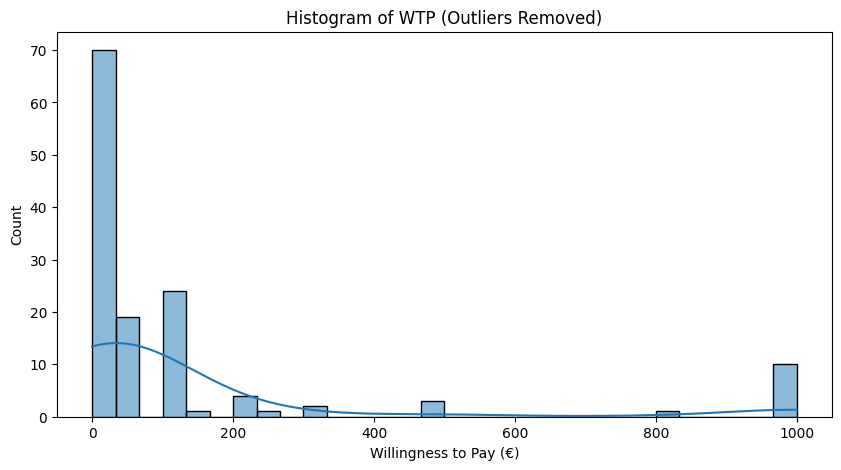

In [13]:

filtered_df = df[df['willingness_to_pay_protection'] <= 1000]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.histplot(data=filtered_df, x='willingness_to_pay_protection', bins=30, kde=True)
plt.title("Histogram of WTP (Outliers Removed)")
plt.xlabel("Willingness to Pay (€)")
plt.ylabel("Count")
plt.show()


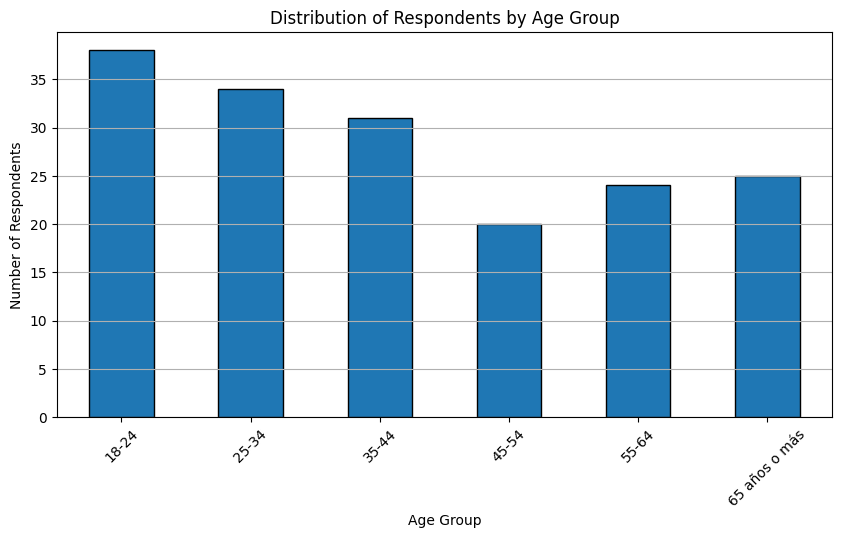

In [15]:
import matplotlib.pyplot as plt

# Count values in each age group and sort the index for proper order
age_counts = df['age'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 5))
age_counts.plot(kind='bar', edgecolor='black')

plt.title("Distribution of Respondents by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


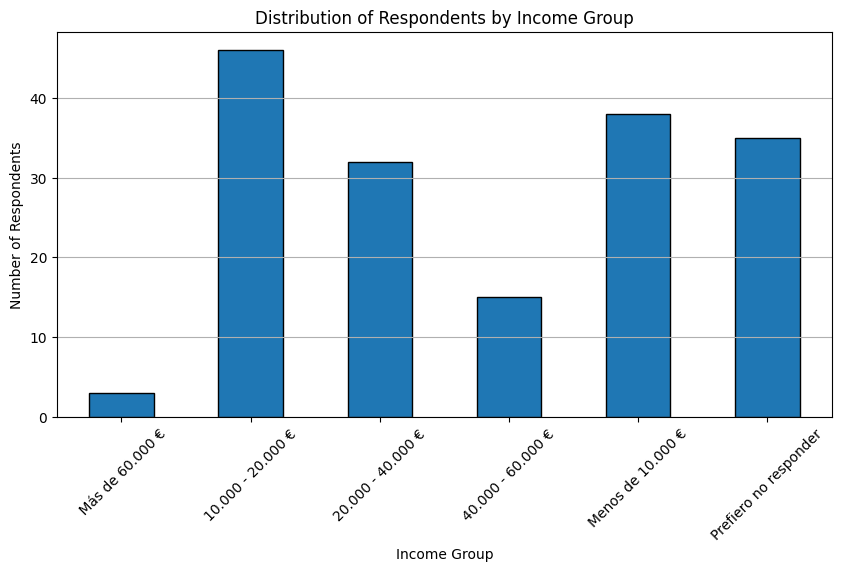

In [16]:
# Count values in each age group and sort the index for proper order
age_counts = df['income'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 5))
age_counts.plot(kind='bar', edgecolor='black')

plt.title("Distribution of Respondents by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
#Regression

#Make sure all variables are usable

#Linear regression
  #Dependent = risk perception (at least 1 risk)
  #Independent variables = age, gender, education
  #Better model... past experience

#logistic
  #dependent = adaptation
  #basic model
  #improved model

